## Tech Challenge <01>

### Grupo

### Curso
Pós graduação em IA para Devs

### Desafio


Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:

```bash
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332
```

Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência.

#### Tarefas

##### Exploração de dados
- Carregue a base de dados e explore suas características.
- Analise estatísticas descritivas e visualize distribuições relevantes.

##### Pré-processamento de dados
- Realize a limpeza dos dados, tratando valores ausentes (se necessário).
- Converta variáveis categóricas em formatos adequados para modelagem.

##### Modelagem
- Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).
- Divida o conjunto de dados em conjuntos de treinamento e teste.

##### Treinamento e avaliação do modelo
- Treine o modelo com o conjunto de treinamento.

##### Validação estatística
- Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

##### O que avaliaremos
Apresente resultados visuais, como gráficos de previsões vs. valores reais.

##### Observações
Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.
Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.


### Base de dados

Nossa base de dados se encontra para download no [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance). 

Trata-se de um levantamento de um plano de saúde, mostrando a relação do custo das despesas médicas e as características de cada beneficiário do seguro.

#### Colunas

- age: Idade do beneficiário 

- sex: Gênero do contratante do seguro (male, female)

- bmi: Índice de massa corporal, que fornece uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura,
índice objetivo de peso corporal (kg/m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9

- children: Numéro de filhos / dependentes cobertos pelo seguro

- smoker: Fumante

- region: Área onde o beneficiário reside nos Estados Unidos (northeast, southeast, southwest, northwest).

- charges: Despesas médicas individuais pagas pelo seguro de saúde

## Get Started

#### Imports

In [140]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Configurações

In [141]:
np.random.seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### Carregando os dados

Utilizando o pandas para carregar a base de dados `.csv` e mostrando as primeiras 5 linhas da tabela com `dados.head()`

In [142]:
dados = pd.read_csv('insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Usando `dados.shape` para mostrar a quantidade de linhas e colunas. Nessa base de dados temos 1338 linhas e 7 colunas

In [143]:
dados.shape

(1338, 7)

#### Analisando os dados

In [144]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Analisando as informações da base de dados, vemos que não existe nenhum dado nulo e que há 3 tipos diferentes de dados (int64, object e float64)

O gráfico acima mostra a relação entre o custo do plano em função da quantidade de filhos/dependentes que o beneficiário tem. Não nos diz muita coisa

<Axes: xlabel='smoker', ylabel='charges'>

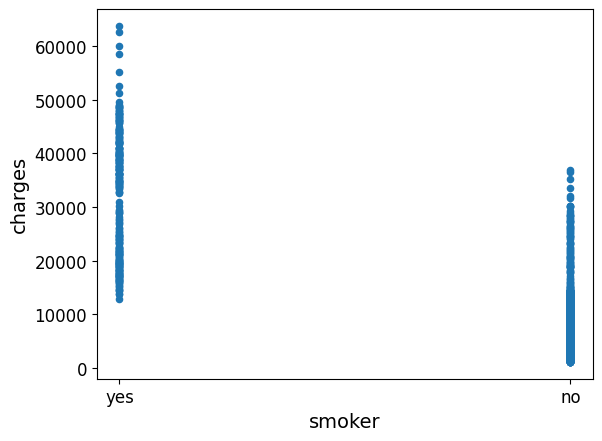

In [145]:
dados.plot.scatter(x='smoker', y='charges')

O gráfico acima mostra a relação entre o custo do plano em função se o beneficiário é ou não fumante. Nesse levantamento podemos ver que há uma diferença, o valor do plano é menor em usuários não fumantes se comparados aos usuário fumantes. Pode ser uma boa característica para nosso target

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

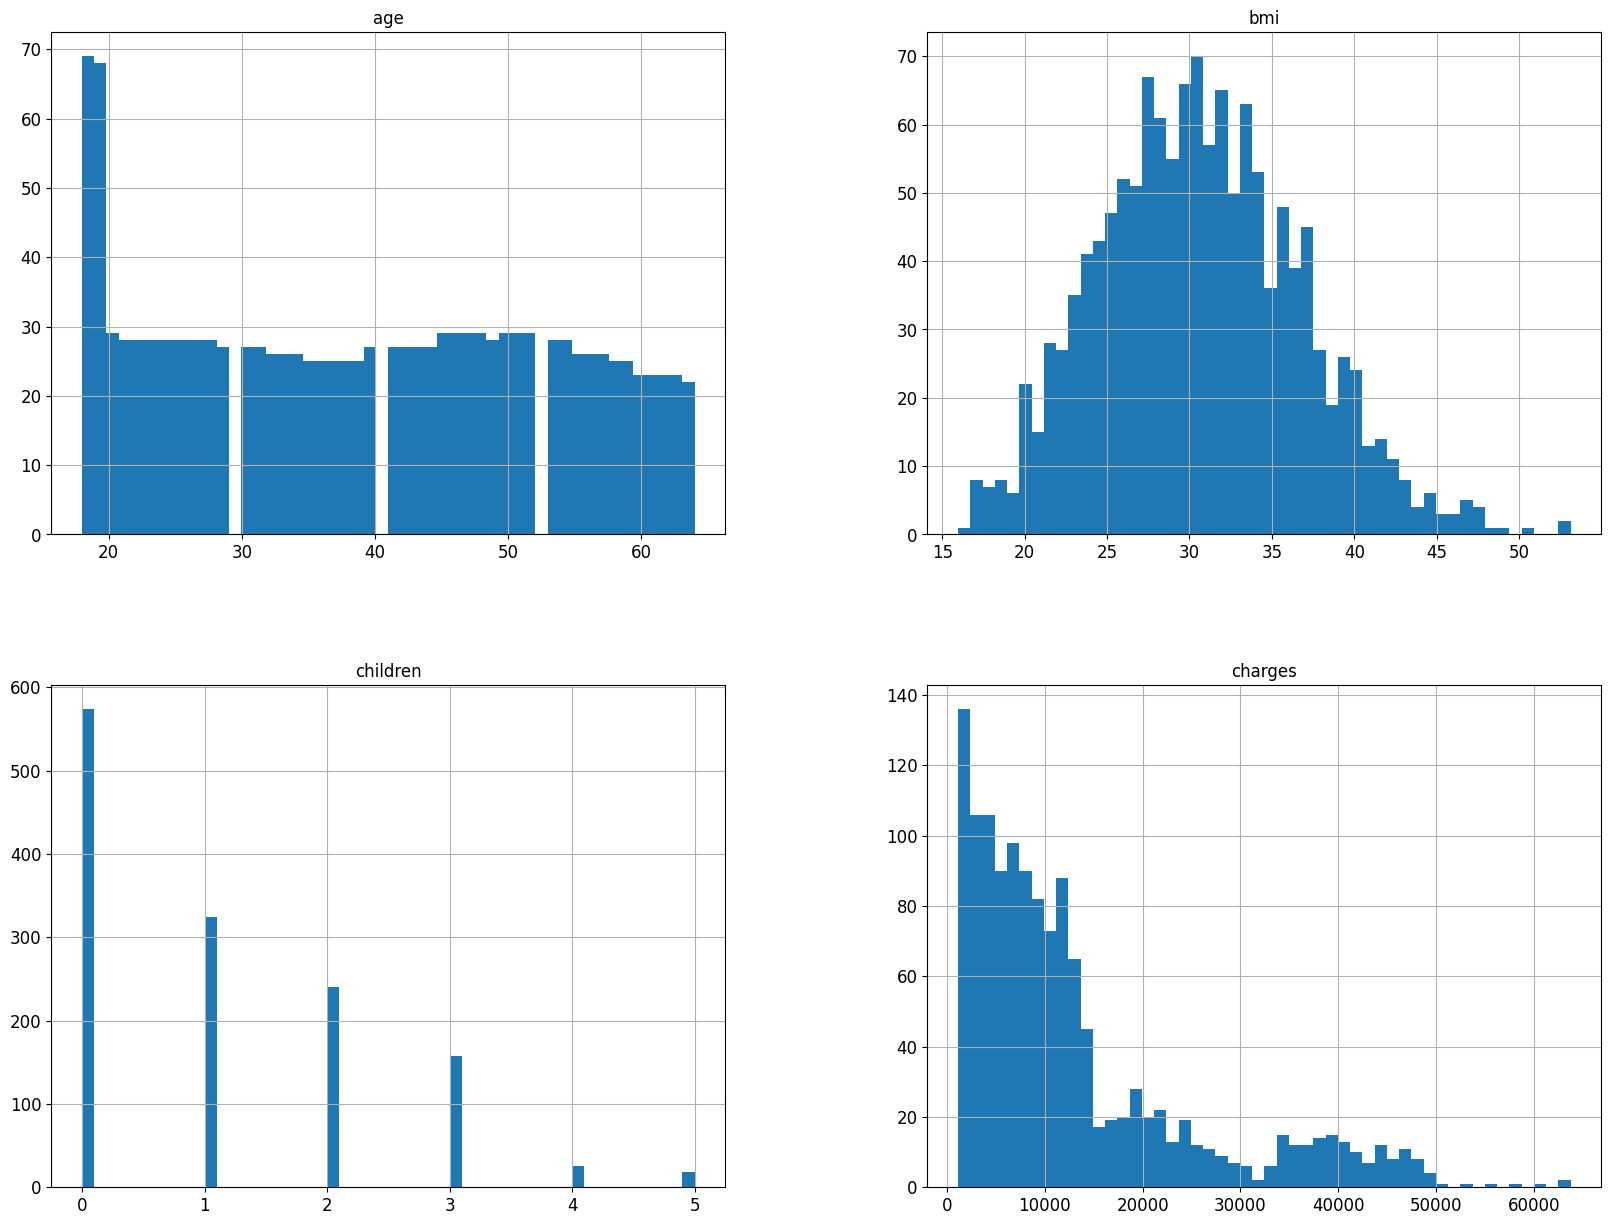

In [146]:
dados.hist(bins=50, figsize=(20,15))

### Pré-processamento dos dados

In [147]:
x = dados[['smoker', 'bmi']]

In [148]:
x

,smoker,bmi
0,yes,27.900
1,no,33.770
2,no,33.000
3,no,22.705
4,no,28.880
...,...,...
1333,no,30.970
1334,no,31.920
1335,no,36.850
1336,no,25.800


In [149]:
y = dados["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Modelagem

In [150]:
df_train, df_test = train_test_split(dados, test_size=0.2, random_state=7)
print(len(df_train), "treinamento +", len(df_test), "teste")

1070 treinamento + 268 teste


In [151]:
dados['charges_category'] = np.ceil(dados['charges'] /1.5)
dados['charges_category'].where(dados['charges_category'] < 2, 2.0, inplace=True)

/tmp/ipykernel_130167/384358269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['charges_category'].where(dados['charges_category'] < 2, 2.0, inplace=True)


In [152]:
dados['charges_category'] = pd.cut(dados['charges'],
                                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                   labels=[1,2,3,4,5])

In [153]:
dados['charges_category'].value_counts()

charges_category
5    1338
1       0
2       0
3       0
4       0
Name: count, dtype: int64